In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,12) #Adjusts the configurations of the plot created

# Read in the data (Entire pathway not shown for security reasons)

df=pd.read_csv(r'-----------\movies.csv')

In [3]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check missing data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Removing rows with null values as it may interfere with analysis later

df.dropna(inplace=True)

In [6]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [7]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#Changing column data types:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [9]:
# The 'year' and the year on the 'released' column does not match
# The true year released is based on the 'released' column

df['yearCorrect']=df['released'].astype(str).str.split(',').str[1].str[1:5]
df['countryReleased']=df['released'].astype(str).str.split(',').str[1].str[7:-1]

In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(200)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,countryReleased
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,Godzilla,PG-13,Action,2014,"May 16, 2014 (United States)",6.4,394000,Gareth Edwards,Ishirô Honda,Aaron Taylor-Johnson,United States,160000000,524976069,Warner Bros.,123.0,2014,United States
5458,Sherlock Holmes,PG-13,Action,2009,"December 25, 2009 (United States)",7.6,596000,Guy Ritchie,Michael Robert Johnson,Robert Downey Jr.,United States,90000000,524028679,Warner Bros.,128.0,2009,United States
4500,Meet the Fockers,PG-13,Comedy,2004,"December 22, 2004 (United States)",6.3,257000,Jay Roach,Greg Glienna,Ben Stiller,United States,80000000,522657936,Universal Pictures,115.0,2004,United States
5260,WALL·E,G,Animation,2008,"June 27, 2008 (United States)",8.4,1000000,Andrew Stanton,Andrew Stanton,Ben Burtt,United States,180000000,521311890,FortyFour Studios,98.0,2008,United States


In [11]:
pd.set_option('display.max_rows', None)

In [12]:
"""
Hypothesis: Budget & company high correlation with Gross
""" 

'\nHypothesis: Budget & company high correlation with Gross\n'

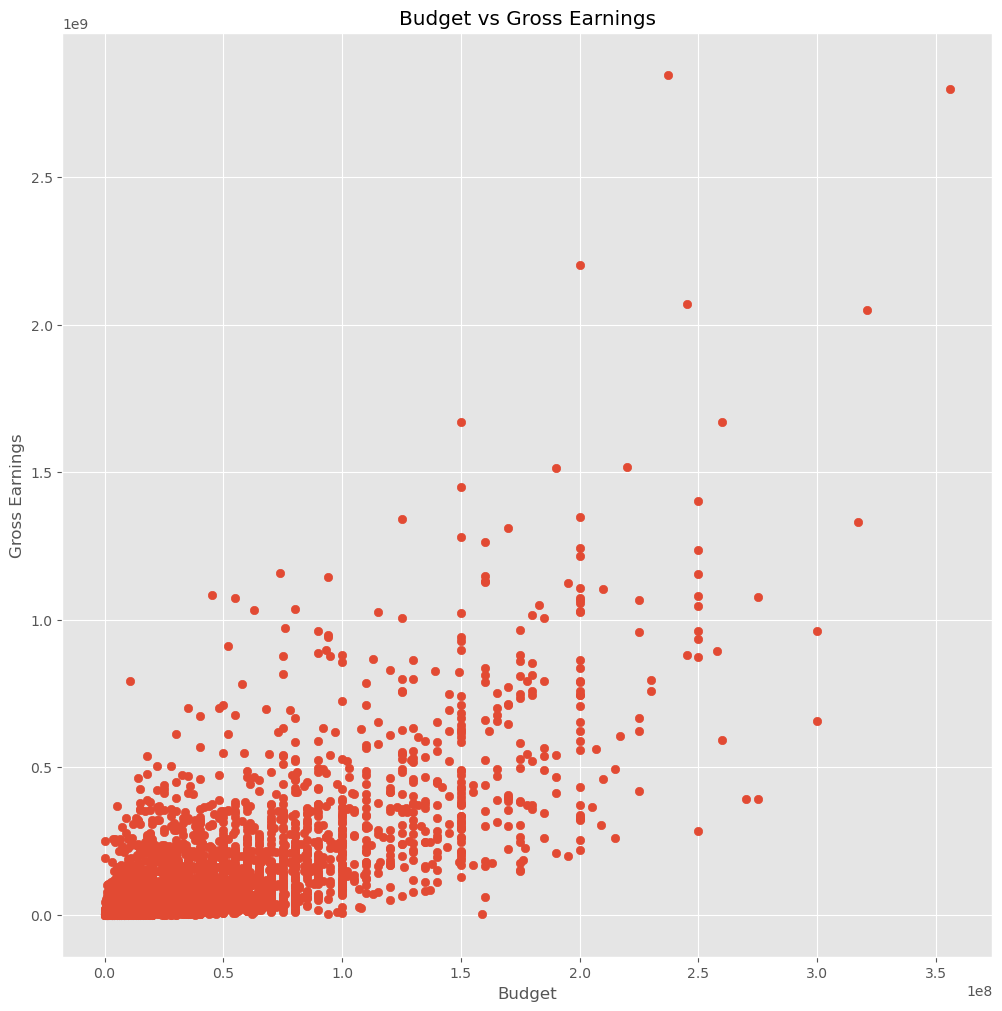

In [13]:
# Scatterplot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

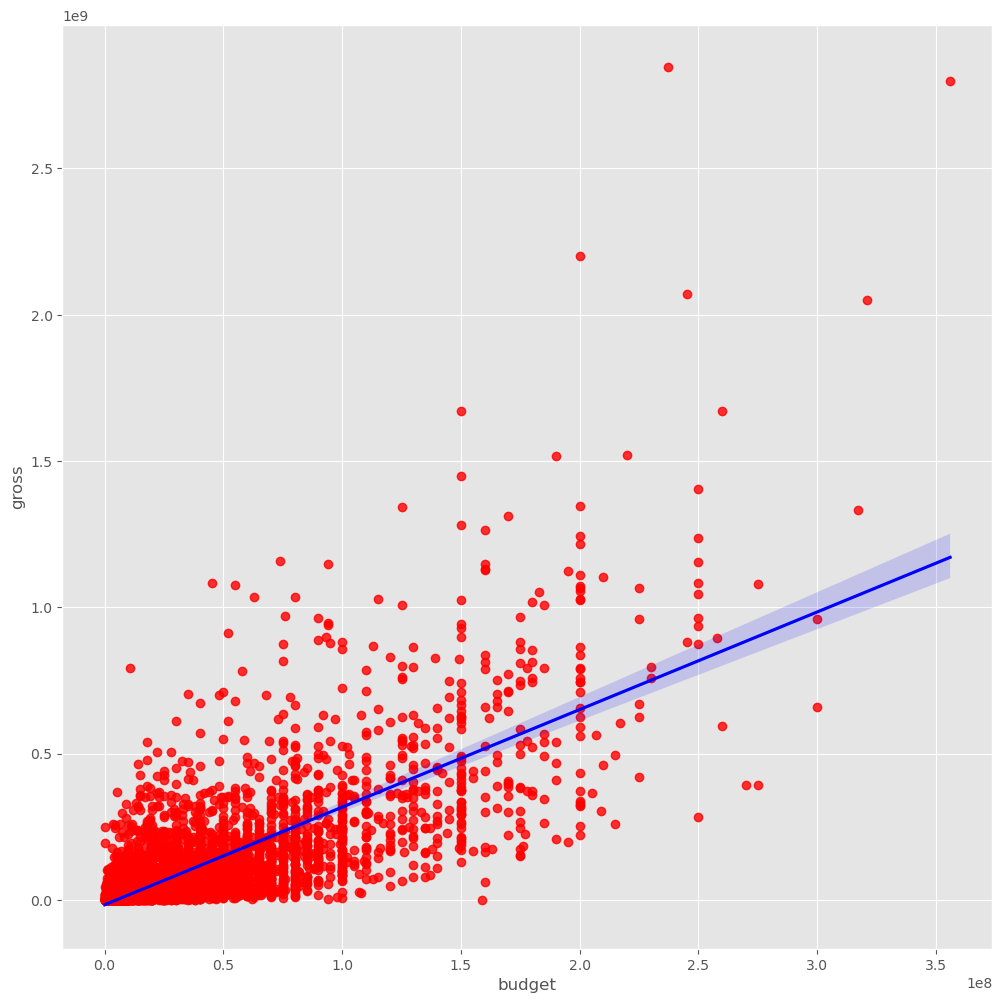

In [14]:
# Budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [15]:
#Correlations
correlation_matrix=df.corr(method='pearson',numeric_only=True)

In [16]:
df.corr(method='kendall',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [17]:
df.corr(method='spearman',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [18]:
# high correlation between budget and gross, gross and votes too.

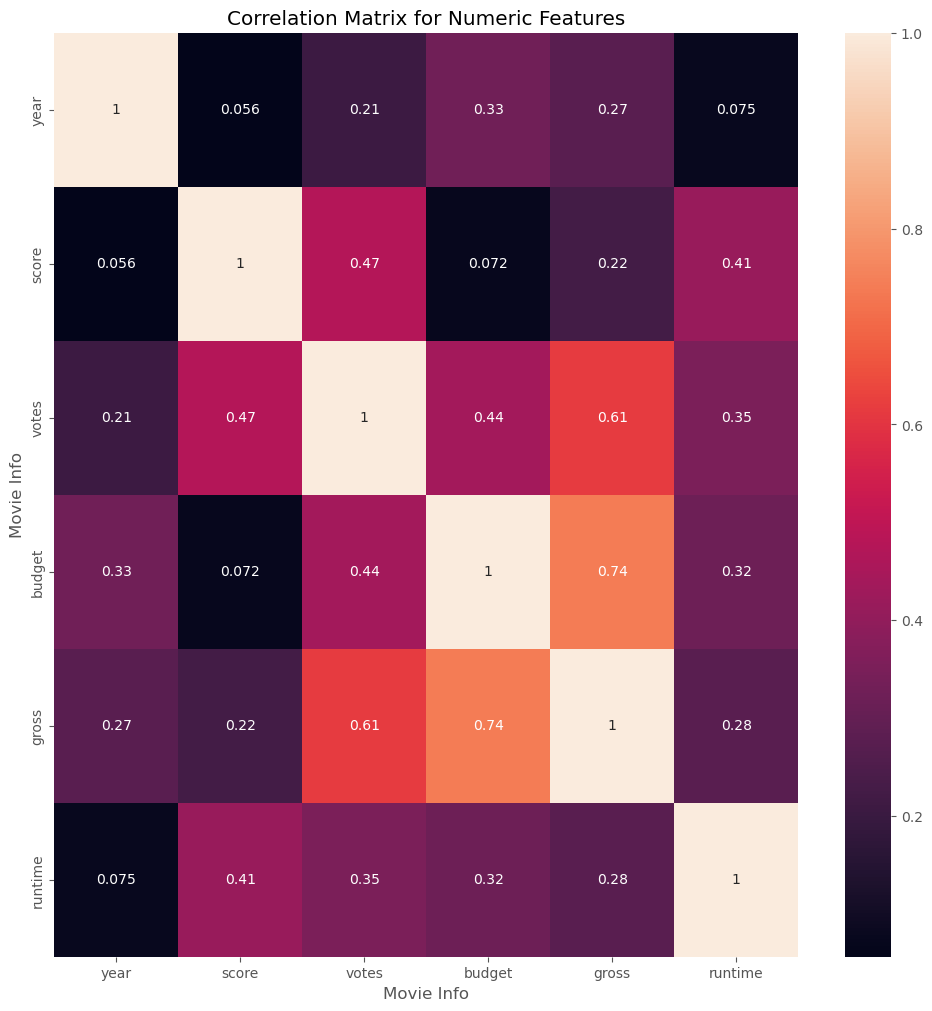

In [19]:
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Info')
plt.ylabel('Movie Info')
plt.show()

In [20]:
# Look at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,countryReleased
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States


In [21]:
df_numerized=df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,countryReleased
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,0,47
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,0,47
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,0,47
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,0,47
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,0,47


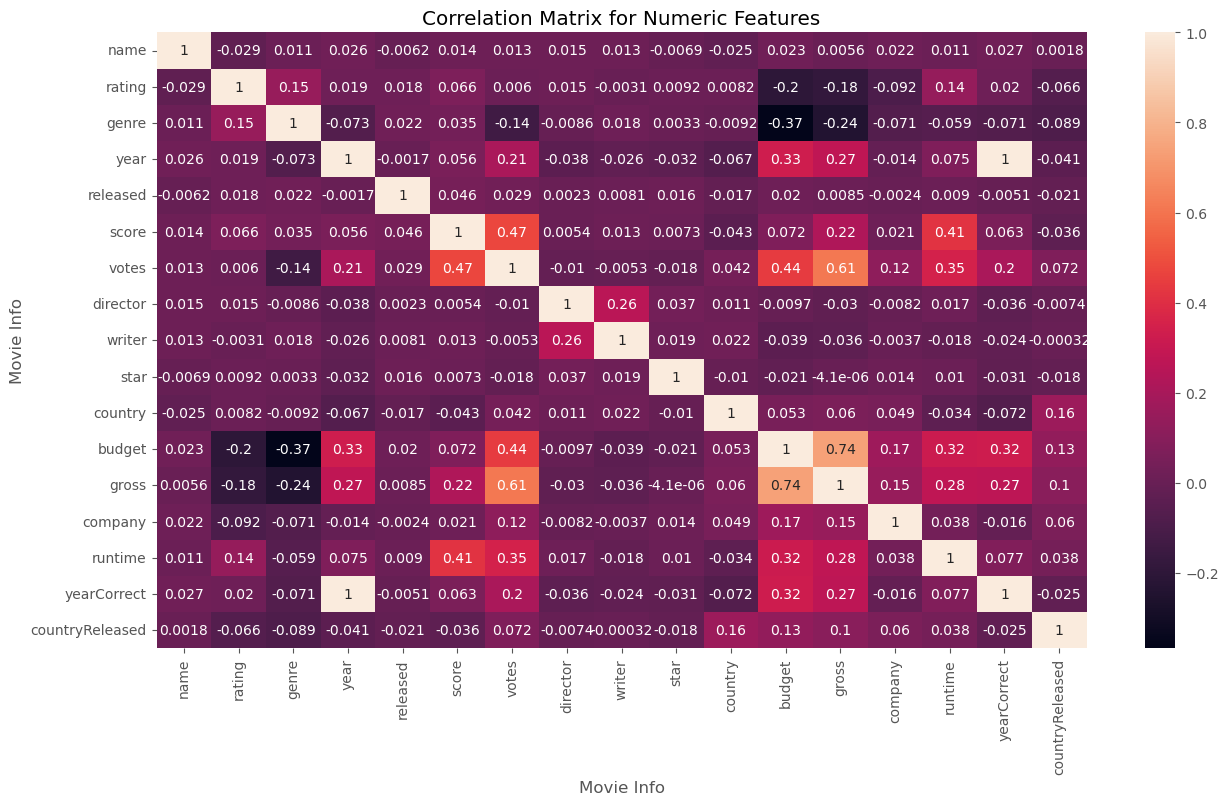

In [22]:
matplotlib.rcParams['figure.figsize']=(15,8)
correlation_matrix2=df_numerized.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix2,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Info')
plt.ylabel('Movie Info')
plt.show()

In [23]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,countryReleased
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026759,0.001759
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019560,-0.065765
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.070699,-0.088701
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.996723,-0.040665
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005141,-0.021032
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.062648,-0.036014
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.204183,0.071616
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.035738,-0.007374
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023603,-0.000317
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.030840,-0.017609


In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect,countryReleased
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,United States


In [25]:
corr_pairs=correlation_matrix2.unstack()

In [26]:
corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 year               0.025542
                 released          -0.006152
                 score              0.014450
                 votes              0.012615
                 director           0.015246
                 writer             0.012880
                 star              -0.006882
                 country           -0.025490
                 budget             0.023392
                 gross              0.005639
                 company            0.021697
                 runtime            0.010850
                 yearCorrect        0.026759
                 countryReleased    0.001759
rating           name              -0.029234
                 rating             1.000000
                 genre              0.147796
                 year               0.019499
                 released           0.018083
          

In [27]:
sorted_pairs=corr_pairs.sort_values()

In [28]:
high_corr=sorted_pairs[(sorted_pairs>0.5)]
high_corr

votes            gross              0.614751
gross            votes              0.614751
budget           gross              0.740247
gross            budget             0.740247
yearCorrect      year               0.996723
year             yearCorrect        0.996723
name             name               1.000000
writer           writer             1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
yearCorrect      yearCorrect        1.000000
countryRel

In [29]:
#votes and budget have the highest correlation to gross earnings. Company has no correlation